<a href="https://colab.research.google.com/github/leodenale/sfs-python/blob/master/doc/examples/sound-field-synthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sound Field Synthesis

Illustrates the usage of the SFS toolbox for the simulation of different sound field synthesis methods.

In [2]:
# Install sfs package
!pip install sfs

     |████████████████████████████████| 71kB 2.0MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import sfs

In [0]:
# Simulation parameters
number_of_secondary_sources = 56
frequency = 680  # in Hz
pw_angle = 30  # traveling direction of plane wave in degree
xs = [-2, -1, 0]  # position of virtual point source in m

grid = sfs.util.xyz_grid([-2, 2], [-2, 2], 0, spacing=0.02)
omega = 2 * np.pi * frequency  # angular frequency
npw = sfs.util.direction_vector(np.radians(pw_angle))  # normal vector of plane wave

Define a helper function for synthesize and plot the sound field from the given driving signals.

In [0]:
def sound_field(d, selection, secondary_source, array, grid, tapering=True):
    if tapering:
        tapering_window = sfs.tapering.tukey(selection, alpha=0.3)
    else:
        tapering_window = sfs.tapering.none(selection)
    p = sfs.fd.synthesize(d, tapering_window, array, secondary_source, grid=grid)
    sfs.plot2d.amplitude(p, grid, xnorm=[0, 0, 0])
    sfs.plot2d.loudspeakers(array.x, array.n, tapering_window)

## Circular loudspeaker arrays

In the following we show different sound field synthesis methods applied to a circular loudspeaker array.

In [0]:
radius = 1.5  # in m
array = sfs.array.circular(number_of_secondary_sources, radius)

### Wave Field Synthesis (WFS)

#### Plane wave

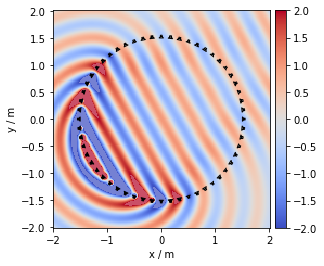

In [7]:
d, selection, secondary_source = sfs.fd.wfs.plane_25d(omega, array.x, array.n, n=npw)
sound_field(d, selection, secondary_source, array, grid)

#### Point source

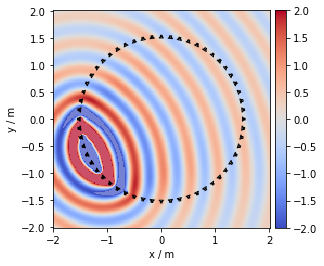

In [8]:
d, selection, secondary_source = sfs.fd.wfs.point_25d(omega, array.x, array.n, xs)
sound_field(d, selection, secondary_source, array, grid)

### Near-Field Compensated Higher Order Ambisonics (NFC-HOA)

#### Plane wave

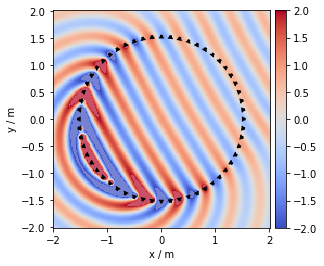

In [9]:
d, selection, secondary_source = sfs.fd.nfchoa.plane_25d(omega, array.x, radius, n=npw)
sound_field(d, selection, secondary_source, array, grid, tapering=False)

#### Point source

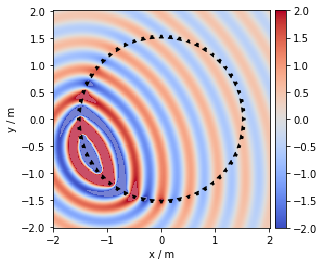

In [10]:
d, selection, secondary_source = sfs.fd.nfchoa.point_25d(omega, array.x, radius, xs)
sound_field(d, selection, secondary_source, array, grid, tapering=False)

## Linear loudspeaker array

In the following we show different sound field synthesis methods applied to a linear loudspeaker array.

In [0]:
spacing = 0.07  # in m
array = sfs.array.linear(number_of_secondary_sources, spacing,
                         center=[0, -0.5, 0], orientation=[0, 1, 0])

### Wave Field Synthesis (WFS)

#### Plane wave

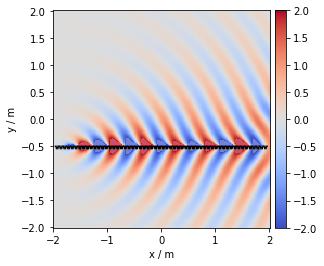

In [12]:
d, selection, secondary_source = sfs.fd.wfs.plane_25d(omega, array.x, array.n, npw)
sound_field(d, selection, secondary_source, array, grid)

#### Point source

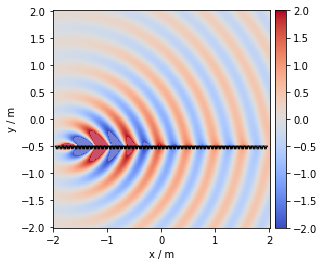

In [13]:
d, selection, secondary_source = sfs.fd.wfs.point_25d(omega, array.x, array.n, xs)
sound_field(d, selection, secondary_source, array, grid)